<a href="https://colab.research.google.com/github/juliooaa/Covid_Brasil/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção dos Dados
Os dados foram obtidos diretamente do [Our World in Data](https://ourworldindata.org/), uma organização sem fins lucrativos que tem como objetivo tornar o conhecimento sobre os grandes problemas acessível e compreensível. Eles são atualizados diariamente e inclui dados sobre casos confirmados, mortes e testes, além de outras variáveis ​​de interesse em potencial.

Esta análise foi realizada no dia 02/09/2020, portanto, os insights obtidos se referem até essa data.

Como o COVID-19 é uma doença muito nova, muito ainda não se sabe sob esse vírus e diversas pesquisas estão sendo realizadas paralelamente, existindo assim, uma grande dificuldade em ter uma base de dados únicas, havendo conflitos entre as diversas bases oficiais e não oficiais.

## Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *iso_code: código de países*
    * *continent: continente da localização geográfica*
    * *location: localização geográfica*
    * *date: data do ocorrido*
    * *total_cases: número total de casos confirmados*
    * *new_cases: novos casos confirmados de COVID-19*
    * *total_deaths: número total de mortes*
    * *new_deaths: novas mortes confimadas por COVID-19*
    * *total_cases_per_million: total de casos confimados por 1.000.000 de pessoas*
    * *new_cases_per_million: novos casos confirmados por 1.000.000 de pessoas*
    * *total_deaths_per_million: total de mortes confirmadas por 1.000.000 de pessaos*
    * *new_deaths_per_million: novas mortes por 1.000.000 de pessoas*
    * *total_tests: total de testes*
    * *new_tests: novos testes*
    * *total_tests_per_thousand: total de testes por 1.000 pessoas*
    * *new_tests_per_thousand: novos testes por 1.000 pessoas*
    * *population: população em 2020*
    * *population_density: número de pessoas divida pela área em quilômetros*
    * *median_age: mediana da idade da população*
    * *aged_65_older: parte da populaçao com mais de 65 anos*
    * *aged_70_older: parte da população com mais de 75 anos*




## Gerando o Dataframe

In [75]:
# importar os pacotes necessários
!pip install bar_chart_race -q
!pip install pywaffle -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr
import plotly.graph_objects as go

from pywaffle import Waffle
from IPython.core.display import display, HTML

# configurar a visualização
sns.set_style()

In [2]:
# importando os dados
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

## Análise Exploratória dos Dados


Nesta etapa iremos entender os nossos dados utilizando de análises para observar como eles estão sendo representados no nosso dataset, se existem inconsistências entre os dados, valores nulos, outliers...

Ela é necessária para garantirmos a veracidade dos dados e, assim, garantir que os insights obtidos realmente representem a realidade


Vamos verificar as primeiras e últimas entradas, o tipo das variáveis e a porcentagem de valores nulos a fim de entendermos melhor o nosso dataset

In [3]:
# verificando as dimensões
print('Dimensões do Dataset',
      '\nVariáveis: ', df.shape[1], '\n'
      'bEntradas: ', df.shape[0])

# verificando as 5 primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  40 
bEntradas:  41170


iso_code      continent  ... hospital_beds_per_thousand life_expectancy
0      ABW  North America  ...                        NaN           76.29
1      ABW  North America  ...                        NaN           76.29
2      ABW  North America  ...                        NaN           76.29
3      ABW  North America  ...                        NaN           76.29
4      ABW  North America  ...                        NaN           76.29

[5 rows x 40 columns]

In [4]:
# verificando o final do dataset
df.tail()

iso_code continent  ... hospital_beds_per_thousand life_expectancy
41165      NaN       NaN  ...                        NaN             NaN
41166      NaN       NaN  ...                        NaN             NaN
41167      NaN       NaN  ...                        NaN             NaN
41168      NaN       NaN  ...                        NaN             NaN
41169      NaN       NaN  ...                        NaN             NaN

[5 rows x 40 columns]

Já podemos observar que existem muitos registros que os dados relacionados ao COVID são 0, provavelmente nas datas em que foram populados ainda não tinha registros de casos nesses países.

Além disso, existem registros que não representam muitas informações como é o caso de registro com 'location' igual a Internacional.

Já podemos observar também a presença de valores nulos no nosso dataset.

In [5]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

Ao verificar os tipos da variáveis observa-se que a coluna 'date' está como object, sendo necessário tranformá-la em datetime

In [6]:
df.date = pd.to_datetime(df.date)
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64


In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Vamos analisar agora a quantidade e a porcentagem de valores nulos no nosso dataset

In [8]:
(df.isnull().sum()).sort_values(ascending=False)

new_tests_per_thousand             27883
new_tests                          27883
total_tests                        27555
total_tests_per_thousand           27555
tests_per_case                     27353
positive_rate                      26989
new_tests_smoothed                 26221
new_tests_smoothed_per_thousand    26221
tests_units                        25466
handwashing_facilities             24081
extreme_poverty                    16927
male_smokers                       12579
female_smokers                     12218
hospital_beds_per_thousand          7866
stringency_index                    6957
aged_65_older                       4949
gdp_per_capita                      4867
aged_70_older                       4598
median_age                          4408
cardiovasc_death_rate               4395
diabetes_prevalence                 3113
population_density                  2079
new_deaths_smoothed_per_million     1605
new_cases_smoothed_per_million      1605
new_cases_smooth

In [9]:
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

new_tests_per_thousand             0.68
new_tests                          0.68
total_tests                        0.67
total_tests_per_thousand           0.67
tests_per_case                     0.66
positive_rate                      0.66
new_tests_smoothed                 0.64
new_tests_smoothed_per_thousand    0.64
tests_units                        0.62
handwashing_facilities             0.58
extreme_poverty                    0.41
male_smokers                       0.31
female_smokers                     0.30
hospital_beds_per_thousand         0.19
stringency_index                   0.17
aged_65_older                      0.12
gdp_per_capita                     0.12
aged_70_older                      0.11
median_age                         0.11
cardiovasc_death_rate              0.11
diabetes_prevalence                0.08
population_density                 0.05
new_deaths_smoothed_per_million    0.04
new_cases_smoothed_per_million     0.04
new_cases_smoothed                 0.04


Percebemos que algumas colunas tem uma alta proporção de valores nulos, para garantir a integridade dos insights não iremos utilizá-las nas análises

Após as alterações de data vamos verificar qual a data mais recente do nosso dataset.

In [16]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2020-09-02 00:00:00')

Vamos descobrir quais os países com maior número de doentes e de mortes

In [11]:
df.loc[df.date == '2020-09-02'][['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:11].reset_index(drop=True)

location  total_deaths
0   United States      184689.0
1          Brazil      122596.0
2           India       66333.0
3          Mexico       65241.0
4  United Kingdom       41504.0
5           Italy       35491.0
6          France       30661.0
7            Peru       29068.0
8            Iran       21672.0
9        Colombia       20052.0

Podemos verificar que os países líderes em número de mortes no dia 09 de Setembro de 2020 eram:


*   Estados Unidos - 184.689 mortes
*   Brasil - 122.596 mortes
*   India - 66.333 mortes

Agora vamos verificar os números de casos:


In [12]:
df.loc[df.date == '2020-09-02'][['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:11].reset_index(drop=True)

location  total_cases
0  United States    6075652.0
1         Brazil    3950931.0
2          India    3769523.0
3         Russia    1000048.0
4           Peru     657129.0
5   South Africa     628259.0
6       Colombia     624069.0
7         Mexico     606036.0
8      Argentina     417722.0
9          Chile     413145.0

Podemos verificar que os países líderes em número de casos no dia 09 de Setembro de 2020 eram:


*   Estados Unidos - 6.075.652 casos
*   Brasil - 3.950.931 casos
*   India - 3.769.523 casos

Analisarei também os países que aprensentam maior número de novos casos e mortes

In [13]:
df.loc[df.date == '2020-09-02'][['location', 'new_cases']].sort_values(by='new_cases', ascending=False)[1:11].reset_index(drop=True)

location  new_cases
0          India    78357.0
1  United States    44639.0
2         Brazil    42659.0
3      Argentina     9309.0
4       Colombia     8901.0
5         Mexico     6476.0
6           Peru     5092.0
7         France     4982.0
8         Russia     4729.0
9    Philippines     3445.0

Podemos verificar que os países líderes em novos casos no dia 09 de Setembro de 2020 eram:


*   India - 78.357 novos casos
*   Estados Unidos - 44.639 novos casos
*   Brasil - 42.659 novos casos

In [14]:
df.loc[df.date == '2020-09-02'][['location', 'new_deaths']].sort_values(by='new_deaths', ascending=False)[1:11].reset_index(drop=True)

location  new_deaths
0         Brazil      1215.0
1          India      1105.0
2  United States      1091.0
3         Mexico       827.0
4       Colombia       389.0
5      Argentina       232.0
6           Peru       124.0
7         Russia       123.0
8   South Africa       114.0
9           Iran       101.0

Podemos verificar que os países líderes em número de novas mortes no dia 09 de Setembro de 2020 eram:


*   Brasil - 1.215 novas mortes
*   India - 1.105 novas mortes
*   Estados Unidos - 1091 novas mortes

Vamos plotar alguns gráficos para uma melhor visualização

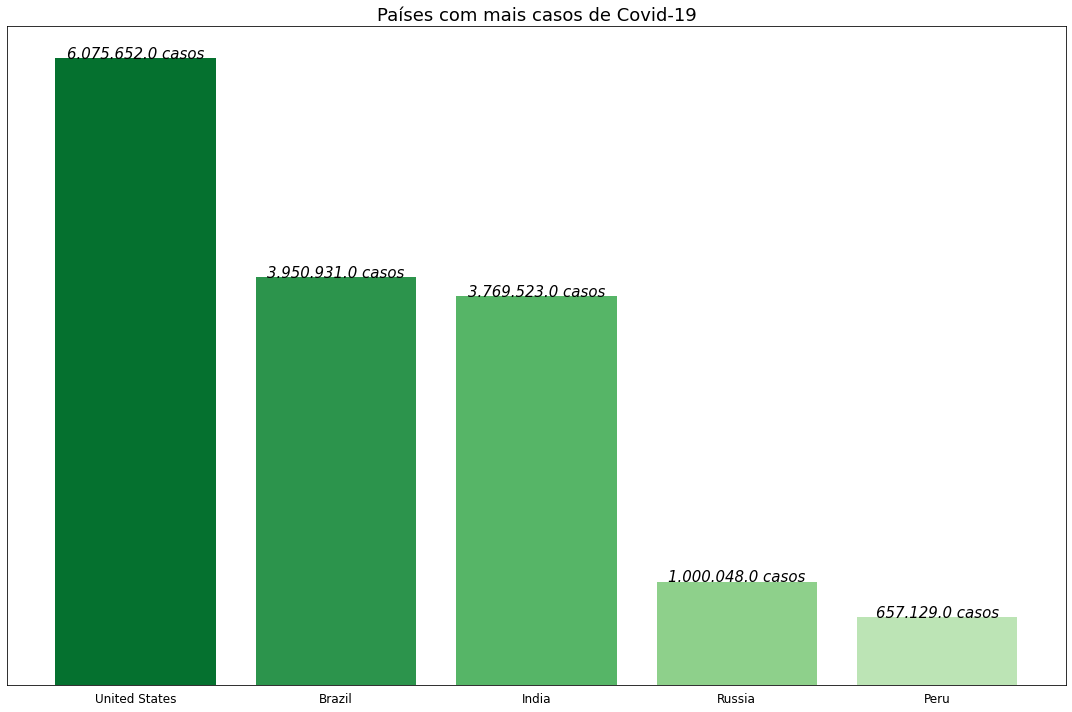

In [46]:
# grafico de barras para total de cases
cores = 'Greens_r'

top_5_total_cases = df.loc[df.date == '2020-09-02', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_cases', data=top_5_total_cases, color=sns.color_palette(cores))
ax.set_title("Países com mais casos de Covid-19", fontsize=18)
ax.grid(False)
ax.tick_params(top=False, bottom=False, left=False,  right=False,  labelbottom=True, labelleft=False, labelsize='large')
ax.ticklabel_format(axis='y', style='plain')

for pX, pY in enumerate(top_5_total_cases['total_cases']):
  b1 = "{0:,} casos".format(pY)
  b2 = b1.replace(',','.')
  ax.annotate(b2, xy=(pX, pY), fontstyle = 'oblique', fontsize=15, horizontalalignment='center')

plt.tight_layout()

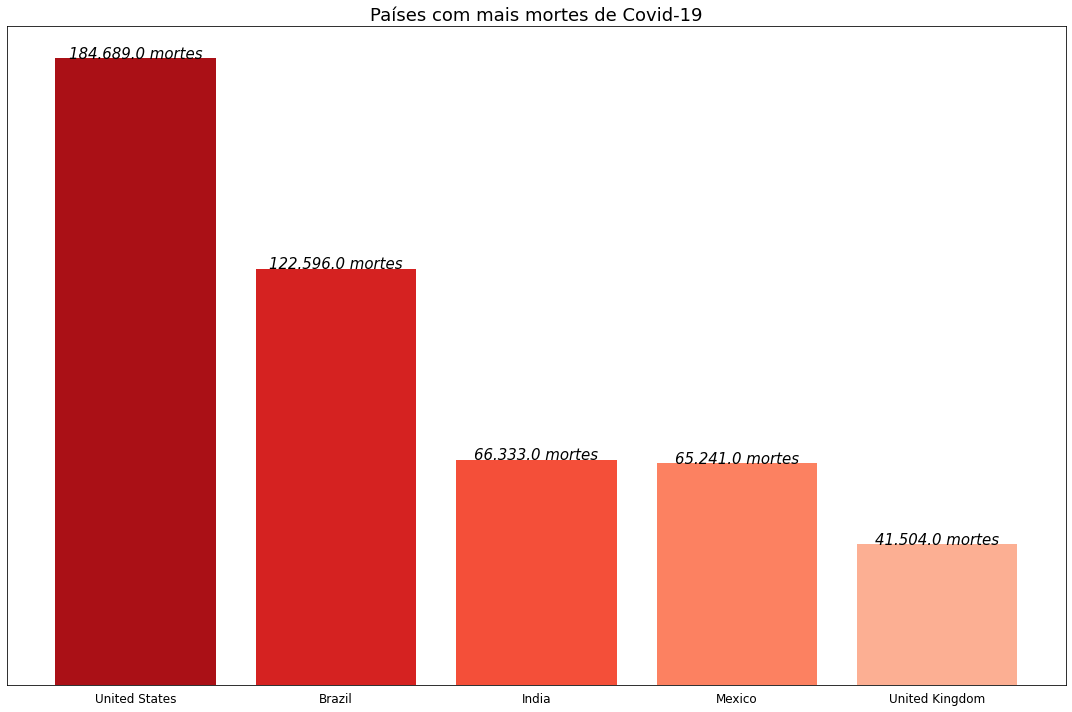

In [45]:
# grafico de barras para total de mortes
cores = 'Reds_r'

top_5_total_deaths = df.loc[df.date == '2020-09-02', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths, color=sns.color_palette(cores))
ax.set_title("Países com mais mortes de Covid-19", fontsize=18)
ax.grid(False)
ax.tick_params(top=False, bottom=False, left=False,  right=False,  labelbottom=True, labelleft=False, labelsize='large')
ax.ticklabel_format(axis='y', style='plain')

for pX, pY in enumerate(top_5_total_deaths['total_deaths']):
  b1 = "{0:,} mortes".format(pY)
  b2 = b1.replace(',','.')
  ax.annotate(b2, xy=(pX, pY), fontstyle = 'oblique', fontsize=15, horizontalalignment='center')

plt.tight_layout()

In [49]:
#MAPA COROPLÉTICO CASOS COVID 19

fig = px.choropleth(data_frame = df.sort_values(by='date', ascending=True),
                    locations= "iso_code",
                    color= "total_cases",
                    color_continuous_scale="tealgrn", 
                    hover_name= "location",
                    animation_frame = 'date',
                    range_color = (0, 2000000),
                    projection = 'natural earth',
                    title = 'EVOLUÇÃO DOS CASOS NO MUNDO',
                    labels= {'total_cases': 'TOTAL DE CASOS', 'date':'DATA'},)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 0.8

fig.show()

ValueError: ignored

In [56]:
#CRIANDO UM NOVO DATAFRAME A PARTIR DO PRIMEIRO DATAFRAME
lista = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']
covid_novo = df.filter(items=lista)

#TRANSFORMANDO A DATA EM DATETIME
covid_novo['date'] = pd.to_datetime(covid_novo['date'])

#CRIANDO GRAFÍCO DE BOLHAS DOS CASOS DE COVID NO MUNDO
soma_casos = covid_novo.groupby(['iso_code', 'continent', 'location']).sum().sort_values('new_cases', ascending=False).reset_index()

fig = px.scatter(data_frame=soma_casos.head(10),
                 x='location', y='new_cases', 
                 size='new_cases',
                 hover_name='location', 
                 size_max=70,
                 opacity = 1, 
                 title='PAÍSES COM MAIS CASOS DE COVID-19',
                 labels = {'new_cases':'TOTAL DE CASOS', 'location':'PAÍSES'},
                 color='new_cases',
                 color_continuous_scale='tealgrn',
                 range_color=(0, 2000000),
                 )

fig.update_layout()


In [57]:
#CRIANDO GRÁFICO DE CORRIDA DE BARRAS DAS MORTES POR COVID-19
lista_paises = ['United States', 'Brazil', 'India', 'Russia', 'South Africa', 
                'Mexico', 'Argentina', 'Colombia', 'United Kingdom', 'Italy',
                'Spain', 'Egypt', 'Japan', 'South Korea','China']
covid_corrida_mortes = pd.DataFrame(covid_novo.groupby(['location', 'date']).sum()['total_deaths']).unstack().T.droplevel(level=0)
paises_corrida_mortes = covid_corrida_mortes.filter(items=lista_paises)

bcr.bar_chart_race(paises_corrida_mortes, n_bars = 10, title='MORTES POR COVID-19 POR PAÍS', filter_column_colors=True, period_fmt='%d %-b, %Y')

### Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar a evolução de mortes no mundo.

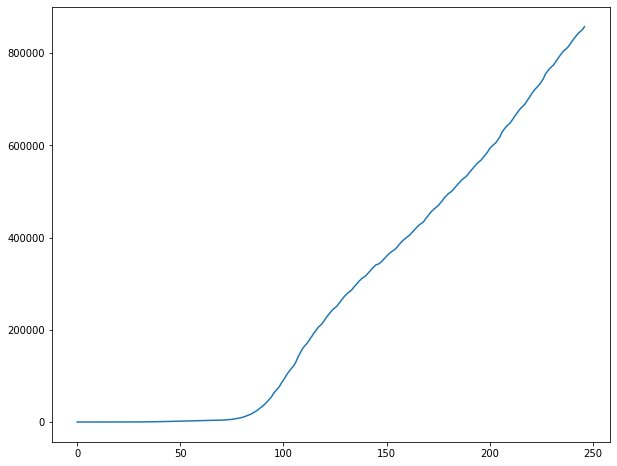

In [18]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

### Análise Exploratória para o Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil

In [20]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

iso_code      continent  ... hospital_beds_per_thousand life_expectancy
5309      BRA  South America  ...                        2.2           75.88
5310      BRA  South America  ...                        2.2           75.88
5311      BRA  South America  ...                        2.2           75.88
5312      BRA  South America  ...                        2.2           75.88
5313      BRA  South America  ...                        2.2           75.88

[5 rows x 40 columns]

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.

In [31]:
# Identificando quando foi o primeiro caso no Brasil
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[5366]))

O primeiro caso foi registrado em 2020-02-26 00:00:00


In [32]:
# Identificar quando foi registrada a primeria morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[5387]))

A primeira morte foi registrada em 2020-03-18 00:00:00


Uma informação interessante para investigarmos é quanto tempo levou desde o primeiro caso até a primeira morte.

In [35]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte
from datetime import date
delta = df_brasil.date.loc[5387] - df_brasil.date.loc[5366]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


Vamos plotar gráficos para observarmos o comportamento da covid no Brasil.

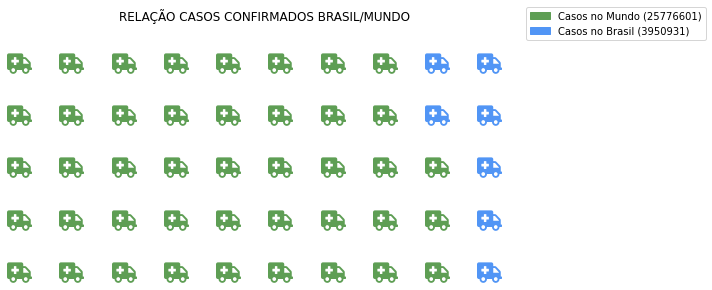

In [68]:
#CONSTRUINDO UM GRÁFICO DE WAFFLE
covid_hoje = covid_novo.loc[df['date'] == df['date'].max(),['location', 'total_cases','total_deaths']].sort_values(by='total_cases', ascending=False)[:1]


total_casos = int(covid_hoje.loc[covid_hoje.index[-1],'total_cases'])


covid_brasil_casos = int(df_brasil['total_cases'].max())
data = {'Casos no Mundo':total_casos, 'Casos no Brasil':covid_brasil_casos}
fig = plt.figure(
    FigureClass=Waffle,
    rows = 5,
    columns = 10,
    colors=('#5e9e54', '#5195f5'),
    title={'label':'RELAÇÃO CASOS CONFIRMADOS BRASIL/MUNDO'},
    values = data,
    labels = [f'Casos no Mundo ({int(total_casos)})', f'Casos no Brasil ({int(covid_brasil_casos)})'],
    legend = {'loc': 'upper left','bbox_to_anchor': (1, 1.1)},
    icons='ambulance',
    icon_size=20,
    figsize=(10,8))


plt.show()

porcentagem_casos = round((covid_brasil_casos * 100) / total_casos, 2)

display(HTML("<h1 style = 'text-align:center;'>  </h1>" +
             "<div style = 'text-align:center;'> " +
             "<span style='color: black; font-size:25px;'>Os casos de COVID-19 no Brasil correspondem a "  + 
             str(porcentagem_casos) + '% dos casos no Mundo.'"</span>" + "</div>"))

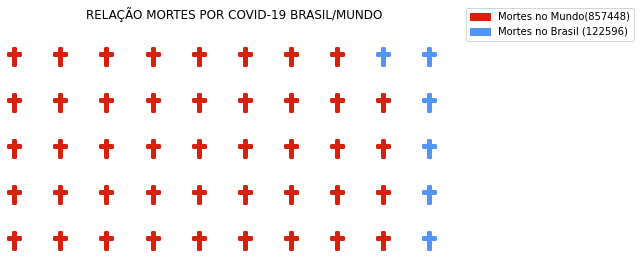

In [70]:
#CRIANDO GRÁFICO DE WAFFLE SOBRE AS MORTES 
covid_brasil_mortes = int(df_brasil['total_deaths'].max())
total_mortes = int(covid_hoje.loc[covid_hoje.index[-1], 'total_deaths'])

data = {'Mortes no Mundo':total_mortes, 'Mortes no Brasil': covid_brasil_mortes}
fig = plt.figure(
    FigureClass=Waffle,
    rows = 5,
    columns = 10,
    colors=('#d6210d', '#5195f5'),
    title={'label':'RELAÇÃO MORTES POR COVID-19 BRASIL/MUNDO'},
    values = data,
    legend = {'loc': 'upper left','bbox_to_anchor': (1, 1.1)},
    labels = [f'Mortes no Mundo({int(total_mortes)})', f'Mortes no Brasil ({int(covid_brasil_mortes)})'],
    icons='cross',
    icon_size=20,
    figsize=(9,7))


plt.show()

porcentagem_mortes = round((covid_brasil_mortes*100)/total_mortes, 2)

display(HTML("<h1 style = 'text-align:center;'>  </h1>" +
             "<div style = 'text-align:center;'> " +
             "<span style='color: black; font-size:25px;'>As mortes por COVID-19 no Brasil correspondem a "  + 
             str(porcentagem_mortes) + '% das mortes no Mundo.'"</span>" + "</div>"))

In [76]:
#DEFININDO AS VARIÁVEIS
casos = pd.DataFrame(df.groupby(['date','location']).sum()['total_cases']).unstack().T.droplevel(level=0).reset_index()
mortes = pd.DataFrame(df.groupby(['date','location']).sum()['total_deaths']).unstack().T.droplevel(level=0).reset_index()

#PORCENTAGEM RELAÇÃO CASOS E MORTES

pct = round((total_mortes * 100) / total_casos, 2)

#CONSTRUINDO UM GRÁFICO PARA RELACIONAR CASOS E MORTES POR COVID-19
def grafico_mundo(location):
    labels = ['CASOS', 'MORTES']
    colors = ['green', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [casos, mortes]
    
    fig = go.Figure()
    
    for i, df in enumerate(df_list):
        if location == 'País':
            x_data = np.array(list(covid.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(covid.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['location'] == location].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ))
    
    fig.update_layout(
        title="COVID-19: " + location,
        xaxis_title='DATA',
        yaxis_title='NÚMERO DE CASOS E MORTES',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800
        ) 
    
    fig.update_yaxes(type="linear")
    fig.show()

grafico_mundo('World')

display(HTML("<h1 style = 'text-align:center;'>  </h1>" +
             "<div style = 'text-align:center;'> " +
             "<span style='color: black; font-size:35px;'> "  + str(pct) + 
             '% das pessoas infectadas, no mundo, vem a óbito.' "</span>" +
             "</div>"))

## Conclusão

Finalmente chegamos ao final da nossa análise sobre os dados do COVID-19 no Mundo e no Brasil, apesar de haver espaço para aprofundar ainda mais essa análise, acredito que ela foi satisfatória e contemplou diversos pontos importantes nesse panorama de como o mundo se encontra com relação à pandemia, sendo assim, pudemos obter boas informações acerca desse tema.

Boas informações no sentido de serem precisas e verdadeiras, no entanto, elas não são nada agradáveis, uma vez que os casos de COVID-19 continuam crescendo em diversas partes do mundo, assim como a quantidade de mortes por meio desse vírus. Alguns países, sim, conseguiram achatar e estabilizar a curva de contágio e vítimas, infelizmente, o Brasil não é um deles. Na realidade, parece que seguimos na direção contrária a outros países que já não possuem registros de novos casos, trocamos diversas vezes de Ministro da Saúde, em meio à maior pandemia do século, o isolamento social não existe mais, e a nossa curva de casos e mortes continua subindo cada vez mais.

O COVID-19 continua sendo um mal para sociedade, afetando toda população mundial, porém, com o auxílio da análise de dados, nós podemos ter uma ideia geral, um panorama sobre a pandemia, e assim tentar combatê-la da melhor forma, ajudando nos esforços do mundo no combate ao COVID-19.

Isso é tudo, pessoal! Até logo!